# №7. Изменение скорости обучения. LR_Scheduler

In [1]:
import torch
import torch.nn as nn

from torch.utils.data import Dataset, DataLoader, random_split

import torchvision
from torchvision.transforms import v2

import os
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import numpy as np

import json
from tqdm import tqdm
from PIL import Image

# plt.style.use('dark_background')

## 0. Создание модели

In [2]:
class myModel(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        hidden_size = 32
        self.model = nn.Sequential(
            nn.Linear(input, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output)
        )
        
    def forward(self, x):
        return self.model(x)

In [3]:
model = myModel(784, 10)
model

myModel(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=10, bias=True)
  )
)

## 1. **LambdaLR**

In [6]:
loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.5)

In [ ]:
# LambdaLR
# Каждый десятый шаг lr=0.1, иначе lr=1
lr_lambda = lambda step: 0.1 if step % 10 == 0 else 1
lr_scheduler = torch.optim.lr_scheduler.LambdaLR(opt, lr_lambda=lr_lambda)
lr_scheduler

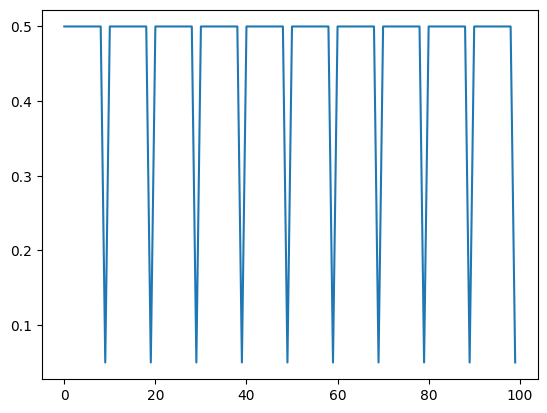

In [10]:
EPOCHS = 100
lr_list = []

for epoch in range(EPOCHS):
    
    # Train
    for _ in range(1):
        # forward
        # backward
        opt.step()
        
    # Validation
        # forward
        
    lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    lr_list.append(lr)
    
plt.plot(lr_list)
plt.show()

## 2. **MultiStepLR** 

`torch.optim.lr_scheduler.MultiStepLR(opt, milestones=[10, 20, 90], gamma=0.1)`
- **militones** - номера шагов, на которых необходимо домножить текущий `lr` на `gamma`

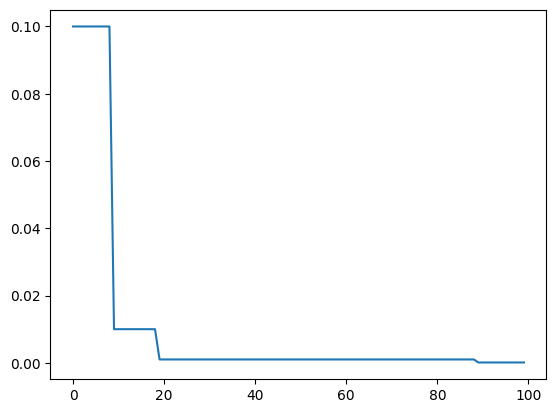

In [11]:
model = myModel(784, 10)

loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr = 0.1)

# MultiStepLR
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(opt, milestones=[10, 20, 90], gamma=0.1)

lr_list = []

for epoch in range(EPOCHS):
    
    # Train
    for _ in range(1):
        # forward
        # backward
        opt.step()
        
    # Validation
        # forward
        
    lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    lr_list.append(lr)
    
plt.plot(lr_list)
plt.show()

## 3. **ExponentialLR**

`torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.9)`
- при каждом вызове метода `.step()` текущий `lr` умножается на к-т `gamma`

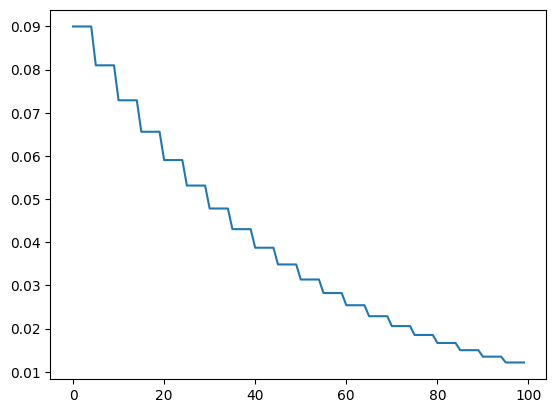

In [14]:
model = myModel(784, 10)

loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr = 0.1)

# ExponentialLR
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.9)

lr_list = []

for epoch in range(EPOCHS):
    
    # Train
    for _ in range(1):
        # forward
        # backward
        opt.step()
        
    # Validation
        # forward
    
    if epoch % 5 == 0:
        # метод .step() можно вызывать не на каждой итерации
        lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    lr_list.append(lr)
    
plt.plot(lr_list)
plt.show()

## 4. **ReduceLROnPlateau**

In [57]:
# ReduceLROnPlateau
model = myModel(784, 10)

loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr = 0.1)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    opt, # оптимизатор
    mode = 'min', # отслеживать уменьшение (min) или увеличение параметра (max)
    factor = 0.1, # множитель (к-т), на который будет умножен lr
    patience = 5, # кол-во эпох без изменения отслеживаемого параметра
    # ----------------------------------------------------------------
    threshold = 0.0001, # порог, на который должен измениться отслеживаемый параметр
    threshold_mode = 'rel', # 'abs'/'rel' - абсолютное/относительное (в процентах) значение изменения
    cooldown = 0, # кол-во периодов ожидания после уменьшения lr
    min_lr = 0, # минимальное значение скорости обучения
    eps = 1e-8 # минимальное изменение между старым и новым lr
)

In [58]:
loss = torch.full([5, 10], 0.1)
loss *= torch.tensor([1/i for i in range(1, 6)]).reshape(5, 1)
loss = loss.reshape([50])
loss

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
        0.0500, 0.0500, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333,
        0.0333, 0.0333, 0.0333, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
        0.0250, 0.0250, 0.0250, 0.0250, 0.0200, 0.0200, 0.0200, 0.0200, 0.0200,
        0.0200, 0.0200, 0.0200, 0.0200, 0.0200])

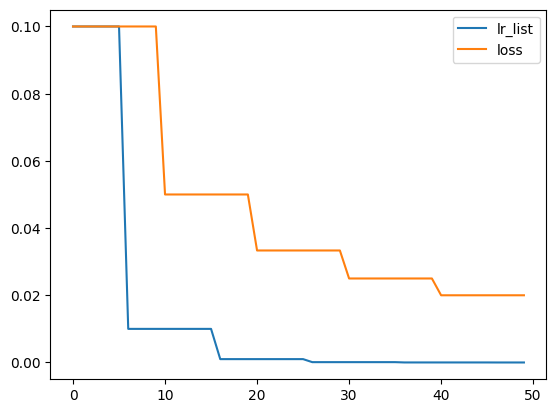

In [59]:
model = myModel(784, 10)

lr_list = []

EPOCHS = 50

for epoch in range(EPOCHS):
    
    # Train
    for _ in range(1):
        # forward
        # backward
        opt.step()
        
    # Validation
        # forward
    
    lr_scheduler.step(loss[epoch])
    lr = lr_scheduler.get_last_lr()
    lr_list.append(lr)
    
plt.plot(lr_list)
plt.plot(loss)
plt.legend(['lr_list', 'loss'])
plt.show()